In [393]:
import numpy as np
import pandas as pd
import os, sys
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from matplotlib import pyplot
import seaborn as sns

In [394]:
#Read data and print data from parkinsons.data
df=pd.read_csv('parkinsons.data')
df.head()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2      0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3      0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4      0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  

[5 rows x 24 columns]

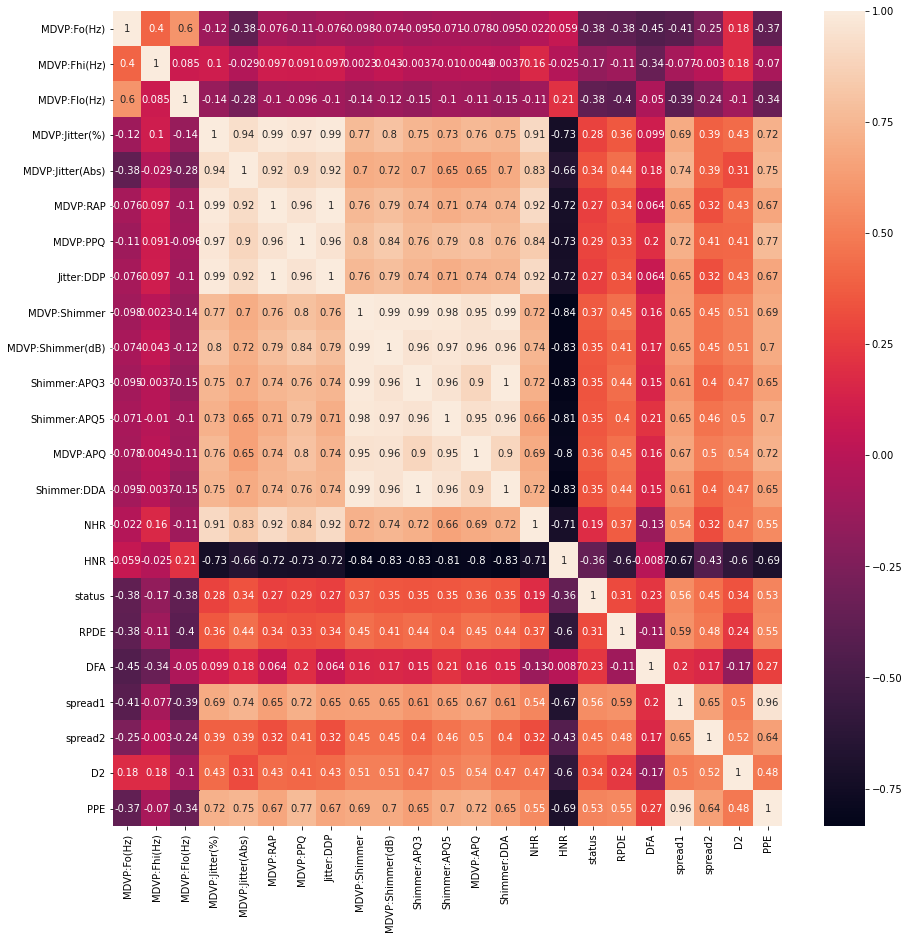

In [395]:
#Plot heatmap of data
fig, ax = pyplot.subplots(figsize=(15,15))
ax = sns.heatmap(df.corr(), annot=True);

In [396]:
#Get the features and labels
features=df.loc[:,df.columns!='status'].values[:,1:]
labels=df.loc[:,'status'].values
print(features)

[[119.992 157.302 74.997 ... 0.266482 2.3014419999999998 0.284654]
 [122.4 148.65 113.819 ... 0.33559 2.486855 0.368674]
 [116.682 131.111 111.555 ... 0.311173 2.342259 0.33263400000000004]
 ...
 [174.688 240.005 74.287 ... 0.158453 2.6797720000000003
  0.13172799999999998]
 [198.764 396.961 74.904 ... 0.207454 2.138608 0.123306]
 [214.289 260.277 77.973 ... 0.190667 2.555477 0.148569]]


In [397]:
#Count number of each label (0 and 1)
print(labels[labels==1].shape[0], labels[labels==0].shape[0])

147 48


In [398]:
#Scale the features to between -1 and 1
scaler=MinMaxScaler((-1,1))
x=scaler.fit_transform(features)
y=labels


In [399]:
#Split the dataset
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=7)

In [ ]:
#Train the xgb model
xgb_model=XGBClassifier()
xgb_model.fit(x_train,y_train)

In [401]:
#Calculate accuracy of xgb model
xgb_y_pred=xgb_model.predict(x_test)
print("XGB Classifier Accuracy:", accuracy_score(y_test, xgb_y_pred)*100)

XGB Classifier Accuracy: 94.87179487179486


XGB Classifier Confusion Matrix: 
[[ 6  1]
 [ 1 31]]


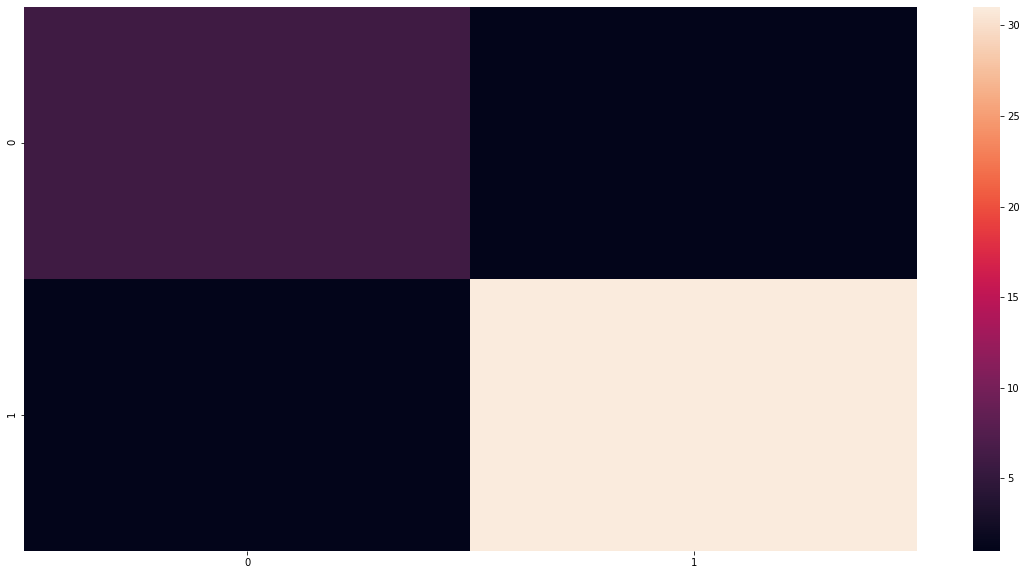

In [402]:
# Confusion matrix of test data and xgb predictions
print("XGB Classifier Confusion Matrix: ")
xgb_confusion_matrix = confusion_matrix(y_test, xgb_y_pred)
print(xgb_confusion_matrix)

#XGB Confusion Matrix Heatmap
sns.heatmap(xgb_confusion_matrix)
pyplot.show()

In [403]:
# Classification of test data and xgb predictions
print("XGB Classifier Classification Report: ")
print(classification_report(y_test, xgb_y_pred))

XGB Classifier Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.97      0.97      0.97        32

    accuracy                           0.95        39
   macro avg       0.91      0.91      0.91        39
weighted avg       0.95      0.95      0.95        39



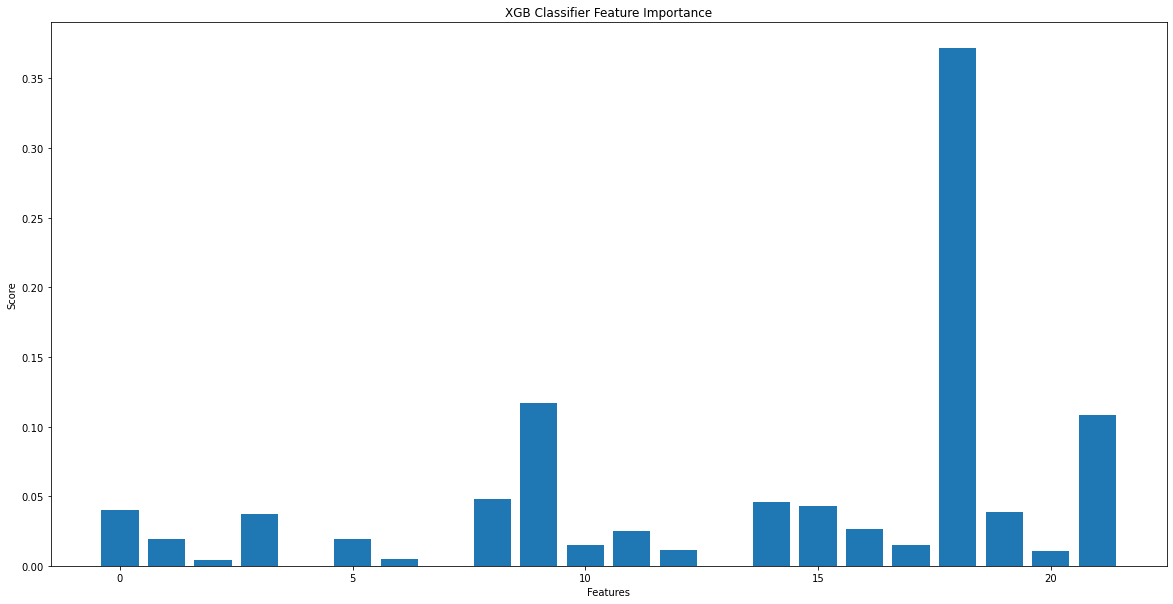

In [404]:
#Feature importance graph for XGBoost Classifier
importance = xgb_model.feature_importances_
pyplot.title('XGB Classifier Feature Importance')
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.xlabel("Features")
pyplot.ylabel("Score")
pyplot.show()

In [405]:
from sklearn.ensemble import RandomForestClassifier

In [406]:
#Train the random forest model
forest_model=RandomForestClassifier()
forest_model.fit(x_train,y_train)

RandomForestClassifier()

In [407]:
#Calculate accuracy of random forest model
forest_y_pred=forest_model.predict(x_test)
print("Random Forest Classifier Accuracy:", accuracy_score(y_test, forest_y_pred)*100)

Random Forest Classifier Accuracy: 92.3076923076923


Random Forest Classifier Confusion Matrix: 
[[ 4  3]
 [ 0 32]]


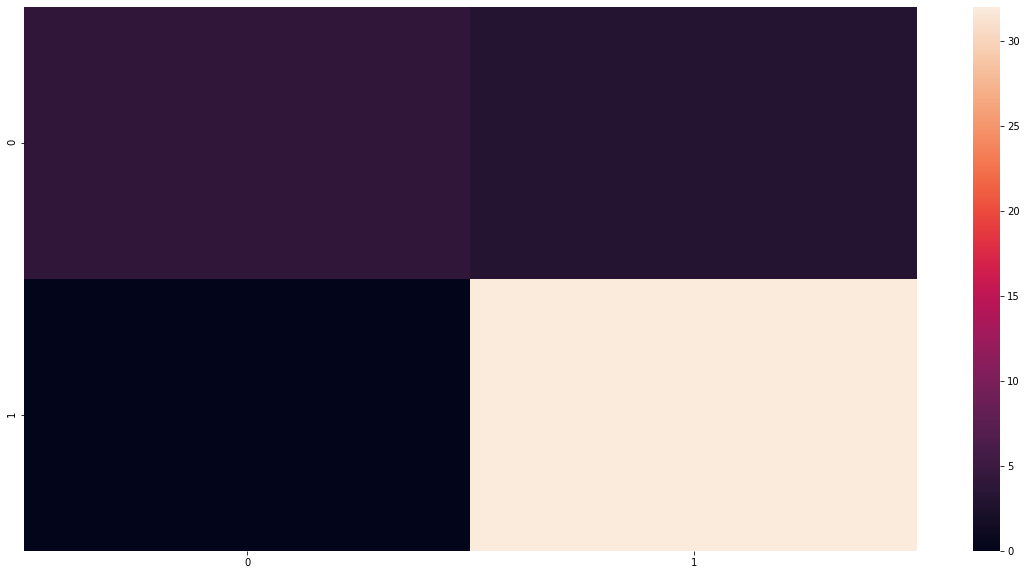

In [408]:
# Confusion matrix of test data and random forest classifier predictions
print("Random Forest Classifier Confusion Matrix: ")
forest_confusion_matrix = confusion_matrix(y_test, forest_y_pred)
print(forest_confusion_matrix)

#Random Forest Confusion Matrix Heatmap
sns.heatmap(forest_confusion_matrix)
pyplot.show()

In [409]:
# Classification of test data and random forest classifier predictions
print("Random Forest Classifier Classification Report: ")
print(classification_report(y_test, forest_y_pred))

Random Forest Classifier Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.57      0.73         7
           1       0.91      1.00      0.96        32

    accuracy                           0.92        39
   macro avg       0.96      0.79      0.84        39
weighted avg       0.93      0.92      0.91        39



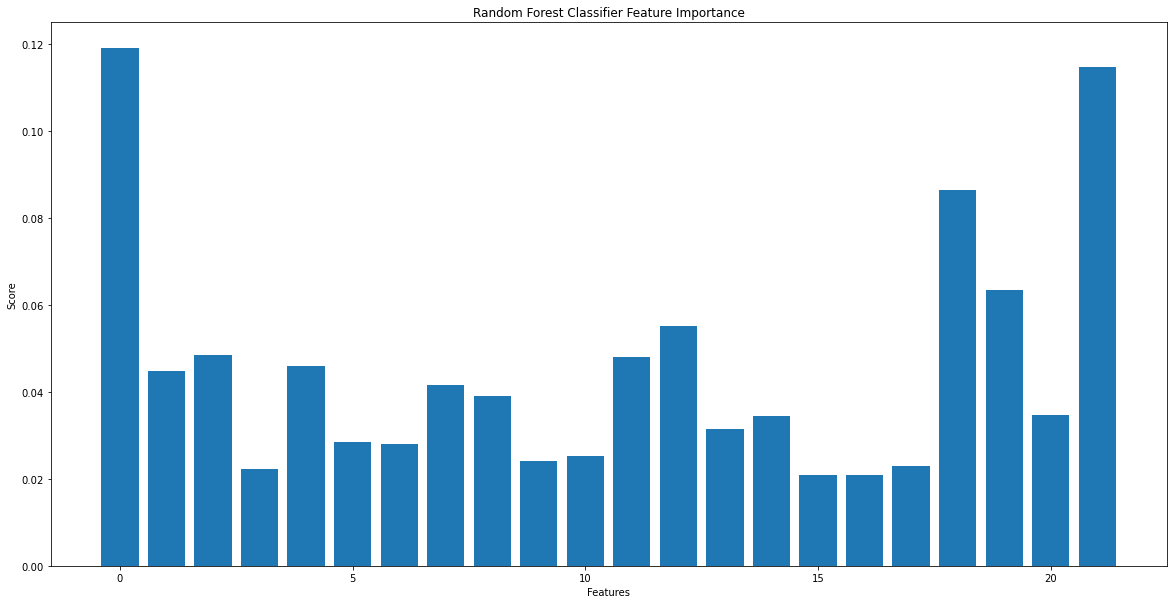

In [410]:
#Feature importance graph for Random Forest Classifier
importance = forest_model.feature_importances_
pyplot.title('Random Forest Classifier Feature Importance')
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.xlabel("Features")
pyplot.ylabel("Score")
pyplot.show()
